![](files/images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © Carlos A. Iglesias

## [Introduction to Machine Learning](2_0_0_Intro_ML.ipynb)

# Table of Contents
* [kNN Model](#kNN-Model)
* [Load data and preprocessing](#Load-data-and-preprocessing)
* [Train classifier](#Train-classifier)
* [Evaluating the algorithm](#Evaluating-the-algorithm)
    * [Precision, recall and f-score](#Precision,-recall-and-f-score)
	* [Confusion matrix](#Confusion-matrix)
	* [K-Fold validation](#K-Fold-validation)
* [Tuning the algorithm](#Tuning-the-algorithm)
* [References](#References)

# kNN Model

The goal of this notebook is to learn how to train a model, make predictions with that model and evaluate these predictions.

The notebook uses the [kNN (k nearest neighbors) algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

## Loading data and preprocessing

The first step is loading and preprocessing the data as explained in the previous notebooks.

In [1]:
# library for displaying plots
import matplotlib.pyplot as plt

# display plots in the notebook 
%matplotlib inline

In [2]:
## First, we repeat the load and preprocessing steps

# Load data
from sklearn import datasets
iris = datasets.load_iris()

# Training and test spliting
from sklearn.model_selection import train_test_split

x_iris, y_iris = iris.data, iris.target

# Test set will be the 25% taken randomly
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.25, random_state=33)

# Preprocess: normalize
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Train classifier

The usual steps for creating a classifier are:
1. Create classifier object
2. Call *fit* to train the classifier
3. Call *predict* to obtain predictions

Once the model is created, the most relevant methods are:
* model.fit(x_train, y_train): train the model
* model.predict(x): predict
* model.score(x, y): evaluate the prediction

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Create kNN model
model = KNeighborsClassifier(n_neighbors=15)

# Train the model using the training sets
model.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [4]:
print("Prediction ", model.predict(x_train))
print("Expected ", y_train)

Prediction  [1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 1 2 2 1 1 0 0 1 0 0 2 1 1 2 2 2 2 0 0 1 1 0
 1 2 1 2 0 2 0 1 0 2 1 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 2 1 1 0 1 1 0 2 1 2 1 2 0 2 0 0 0 2 1 2 1 2 1 2
 0]
Expected  [1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 1 2 2 1 1 0 0 2 0 0 2 1 1 2 2 2 2 0 0 1 1 0
 1 2 1 2 0 2 0 1 0 2 1 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 1 1 1 0 1 1 0 2 2 2 1 2 0 1 0 0 0 2 1 2 1 2 1 2
 0]


In [5]:
# Evaluate Accuracy in training

from sklearn import metrics
y_train_pred = model.predict(x_train)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))

Accuracy in training 0.9642857142857143


In [6]:
# Now we evaluate error in testing
y_test_pred = model.predict(x_test)
print("Accuracy in testing ", metrics.accuracy_score(y_test, y_test_pred))

Accuracy in testing  0.9210526315789473


Now we are going to visualize the Nearest Neighbors classification. It will plot the decision boundaries for each class.

We are going to import a function defined in the file [util_knn.py](files/util_knn.py) using the *magic command* **%run**.

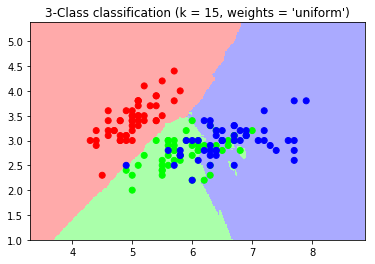

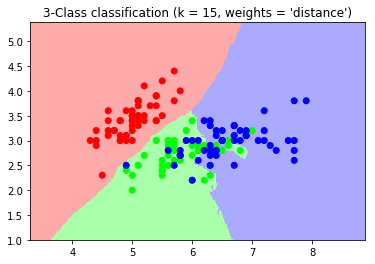

In [7]:
%run util_knn.py

plot_classification_iris()

## Evaluating the algorithm

### Precision, recall and f-score

For evaluating classification algorithms, we usually calculate three metrics: precision, recall and F1-score

* **Precision**: This computes the proportion of instances predicted as positives that were correctly evaluated (it measures how right our classifier is when it says that an instance is positive).
* **Recall**: This counts the proportion of positive instances that were correctly evaluated (measuring how right our classifier is when faced with a positive instance).
* **F1-score**: This is the harmonic mean of precision and recall, and tries to combine both in a single number.

In [8]:
print(metrics.classification_report(y_test, y_test_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.79      1.00      0.88        11
   virginica       1.00      0.84      0.91        19

   micro avg       0.92      0.92      0.92        38
   macro avg       0.93      0.95      0.93        38
weighted avg       0.94      0.92      0.92        38



### Confusion matrix

Another useful metric is the confusion matrix

In [9]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[ 8  0  0]
 [ 0 11  0]
 [ 0  3 16]]


We see we classify well all the 'setosa' and 'versicolor' samples. 

### K-Fold validation

In order to avoid bias in the training and testing dataset partition, it is recommended to use **k-fold validation**.

In [10]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create a composite estimator made by a pipeline of preprocessing and the KNN model
model = Pipeline([
        ('scaler', StandardScaler()),
        ('kNN', KNeighborsClassifier())
])

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x_iris, y_iris, cv=cv)
print(scores)

[0.93333333 0.8        1.         0.93333333 0.93333333 0.93333333
 1.         1.         0.86666667 0.93333333]


We get an array of k scores. We can calculate the mean and the standard error to obtain a final figure

In [11]:
from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

Mean score: 0.933 (+/- 0.020)


So, we get an average accuracy of 0.940.

## Tuning the algorithm

We are going to tune the algorithm, and calculate which is the best value for the k parameter.

Text(0, 0.5, 'Accuracy')

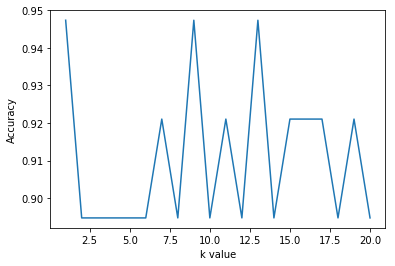

In [12]:
k_range = range(1, 21)
accuracy = []
for k in k_range:
    m = KNeighborsClassifier(k)
    m.fit(x_train, y_train)
    y_test_pred = m.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
plt.plot(k_range, accuracy)
plt.xlabel('k value')
plt.ylabel('Accuracy')


The result is very dependent of the input data. Execute again the train_test_split and test again how the result changes with k.

## References

* [KNeighborsClassifier API scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Learning scikit-learn: Machine Learning in Python](http://proquest.safaribooksonline.com/book/programming/python/9781783281930/1dot-machine-learning-a-gentle-introduction/ch01s02_html), Raúl Garreta; Guillermo Moncecchi, Packt Publishing, 2013.


## Licence
The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Carlos A. Iglesias, Universidad Politécnica de Madrid.